En este archivo se generarán 5 codebooks a partir de vectores de 10 características usando k-means.
En este caso, los vectores de características serán generados aleatoriamente usando numpy

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [231]:
# Generamos 500 vectores aleatorios de dimensión 10, divididos en 5 grupos de 100,
# asegurando que estén separados.
np.random.seed(9)
group_centers = [np.random.rand(10) * 12 for _ in range(5)]
train_vectors = np.vstack([np.random.randn(100, 10) + center for center in group_centers])
test_vectors = np.vstack([np.random.randn(1, 10) + group_centers[np.random.choice(range(5))] for _ in range(20)])

print(train_vectors.shape)
print(test_vectors.shape)

(500, 10)
(20, 10)


C:\Users\Willy\AppData\Local\Temp\ipykernel_20944\1605572592.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


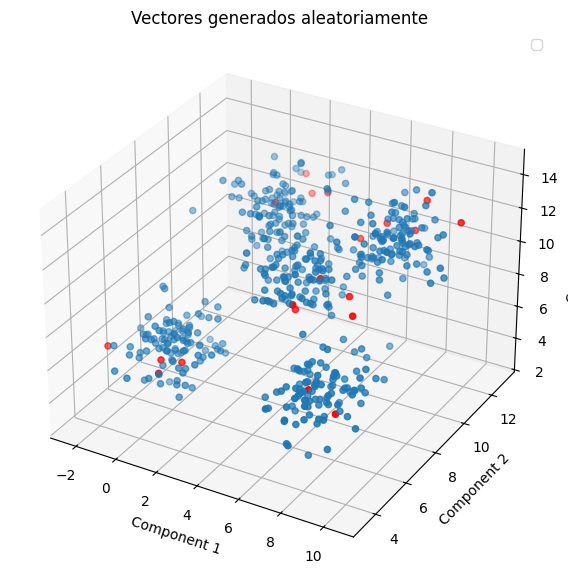

In [232]:
# Graficamos los primeros 3 componentes de los vectores generados
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_vectors[:, 0], train_vectors[:, 1], train_vectors[:, 2])
ax.scatter(test_vectors[:, 0], test_vectors[:, 1], test_vectors[:, 2], c='r')

ax.set_title("Vectores generados aleatoriamente")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()

# Mostramos la gráfica
plt.show()

In [233]:
# Implementación de K-means

def classify_vectors(points, centroids):
    """
    Classify each point to the nearest centroid.
    
    :param points: Dataset, a 2D numpy array where each row is a vector
    :param centroids: Current centroids
    :return: Cluster assignments for each point
    """
    clusters = np.zeros(points.shape[0])
    for i, point in enumerate(points):
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

def compute_inertia(points, centroids, clusters):
    """
    Compute the inertia (sum of squared distances between points and their nearest centroids).
    
    :param points: Dataset, a 2D numpy array where each row is a vector
    :param centroids: Current centroids
    :param clusters: Cluster assignments for each point
    :return: The total inertia for the current clustering
    """
    inertia = 0
    for i, point in enumerate(points):
        centroid = centroids[int(clusters[i])]
        inertia += np.sum((point - centroid) ** 2)
    return inertia

def kmeans(points, k, max_iters=100, tol=1e-4, seed=17, reruns=10):
    """
    Perform K-means clustering.
    
    :param points: Dataset, a 2D numpy array where each row is a vector
    :param k: Number of clusters
    :param max_iters: Maximum number of iterations of each run
    :param tol: Tolerance for checking convergence (if centroids move less than tol)
    :param seed: Seed for the random number generator
    :param reruns: Ammount of times the algorithm will run to provide best results
    :return: Final centroids and cluster assignments
    """

    random = np.random.RandomState(seed)

    best_inertia = float('inf')
    best_centroids = None
    best_clusters = None

    for _ in range(reruns):
        # Choose k random points from the dataset as centroids
        centroids_indexes = random.choice(points.shape[0], k, replace=False)
        centroids = points[centroids_indexes]
        clusters = np.zeros(points.shape[0])

        for _ in range(max_iters):
            # Classify all points into nearest cluster
            clusters = classify_vectors(points, centroids)

            # Calculate the new centroids
            new_centroids = np.zeros_like(centroids)
            for cluster in range(k):
                cluster_points = points[clusters == cluster]
                if len(cluster_points) > 0:
                    new_centroids[cluster] = np.mean(cluster_points, axis=0)

            # Stop if all the centroids moved less than the tolerance
            if np.all(np.abs(new_centroids - centroids) < tol):
                break

            centroids = new_centroids

        inertia = compute_inertia(points, centroids, clusters)

        if inertia < best_inertia:
            best_inertia = inertia
            best_centroids = centroids
            best_clusters = clusters

    return best_centroids, best_clusters

In [234]:
# Calculamos las clases de los puntos generados usando la función k-means implementada

# Los puntos se crearon para que sean 5 clases, entonces K = 5
k = 5

centroids, clusters = kmeans(train_vectors, k)
print(centroids)
#print(clusters)

[[ 0.17584555  6.03320543  5.99035661  1.57171145  1.8257354   2.68402535
   4.93122727  2.99697674  1.10017787  4.22272221]
 [ 1.93361825 10.44423027 11.37207044  0.47877722  8.42328825  6.82616221
  10.80298966  8.01004579  6.5358303   8.24500169]
 [ 4.65963878  8.29332664  9.89873938  5.60536671 11.17692141  9.80808081
  11.8627093   1.99113267  6.20695476 11.23530235]
 [ 7.38373465  5.91123827  5.96662738  5.18383247 10.48966381  2.46469603
   8.30780003  8.4351193  11.0275333   0.4940627 ]
 [ 7.75901559 10.23571976 11.565043    2.18095633  2.94930665 10.43834832
  10.89675924  9.09791695  4.06173687  5.66725318]]


In [235]:
# Imprimir la cantidad de puntos para cada clase:
for i in range(k):
    print(f"Puntos en la clase {i+1}:", np.sum(clusters == i))

Puntos en la clase 1: 100
Puntos en la clase 2: 100
Puntos en la clase 3: 100
Puntos en la clase 4: 100
Puntos en la clase 5: 100


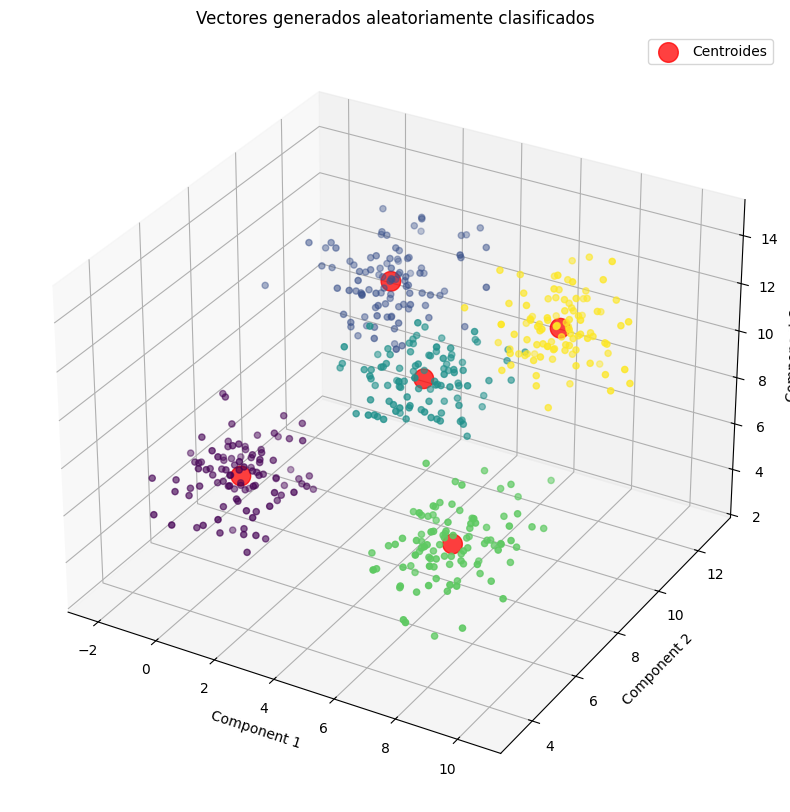

In [236]:
# Graficamos los primeros 3 componentes de los vectores clasificados
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(train_vectors[:, 0], train_vectors[:, 1], train_vectors[:, 2], c=clusters, cmap='viridis')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.75, label='Centroides')

ax.set_title("Vectores generados aleatoriamente clasificados")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()

plt.show()

In [237]:
# Función para generar el codebook de cada cluster

def binary_split_codebook(points, M, tol=1e-4, seed=62):
    """
    Perform Binary Split Codebook Generation Algorithm.
    
    :param points: Dataset, a 2D numpy array where each row is a vector
    :param M: Target number of codebook vectors (centroids)
    :param tol: Tolerance for checking convergence of distortion
    :param seed: Seed for the random number generator
    :return: Final codebook (centroids) and the cluster assignments
    """
    
    random = np.random.RandomState(seed)

    # Start with 1 centroid
    m = 1
    centroids = [np.mean(points, axis=0).reshape(1, -1)]

    clusters = np.array([0] * points.shape[0])
    
    while m < M:
        new_centroids = []
        for centroid in centroids:
            # Perturbation factor (small random vector to split centroid)
            perturbation = random.randn(*centroid.shape) * 0.1
            new_centroids.append(centroid + perturbation)
            new_centroids.append(centroid - perturbation)
        
        centroids = np.vstack(new_centroids)  # Double the number of centroids
        m = len(centroids)

        distortion = 0

        # Classify Vectors into New Centroids
        while True:
            clusters = classify_vectors(points, centroids)
            
            # Find new centroids
            new_centroids = np.zeros_like(centroids)
            for cluster in range(m):
                cluster_points = points[clusters == cluster]
                if len(cluster_points) > 0:
                    new_centroids[cluster] = np.mean(cluster_points, axis=0)
            
            centroids = new_centroids
            
            # Compute distortion
            new_distortion = compute_inertia(points, centroids, clusters)
            if np.abs(distortion - new_distortion) < tol:
                break
            distortion = new_distortion
    
    return centroids, clusters

In [238]:
# Generamos el codebook de cada cluster
# Elegiremos 16 = 2^4 vectores para cada cluster
M = 16
codebooks = np.array([binary_split_codebook(train_vectors[clusters == i], M)[0] for i in range(k)])
all_codes = np.vstack(codebooks)
print(codebooks.shape)
print(codebooks)

(5, 16, 10)
[[[-9.89876436e-02  5.71805985e+00  7.03886492e+00  2.85884145e+00
    1.90561482e+00  1.23615080e+00  4.33088773e+00  3.31960821e+00
    1.64879230e+00  4.42156714e+00]
  [ 7.80454645e-02  6.15081179e+00  6.20708739e+00  1.28605765e+00
    1.14602780e+00  1.07788982e+00  3.55935593e+00  2.58069975e+00
    7.20331338e-01  3.89074792e+00]
  [ 1.80894299e-03  6.49783106e+00  7.02393092e+00  9.70748230e-01
    1.74878986e+00  3.28016675e+00  4.25769874e+00  2.72824972e+00
   -1.39759565e-01  4.29975993e+00]
  [ 1.21338883e-01  6.58545864e+00  5.99782825e+00  1.33660210e+00
    2.25346322e+00  3.40049534e+00  3.88001442e+00  2.66007755e+00
    1.24815993e+00  5.05263684e+00]
  [ 2.18700846e-01  5.79470813e+00  6.61914243e+00 -3.23416887e-02
    1.26119908e+00  2.96598530e+00  5.83265819e+00  4.12002761e+00
    1.92651645e+00  5.11482568e+00]
  [ 6.99503639e-01  4.80989753e+00  5.26869705e+00  1.05783586e+00
    8.14247336e-01  2.56154139e+00  4.87593118e+00  3.14790915e+00
    

C:\Users\Willy\AppData\Local\Temp\ipykernel_20944\1292951654.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


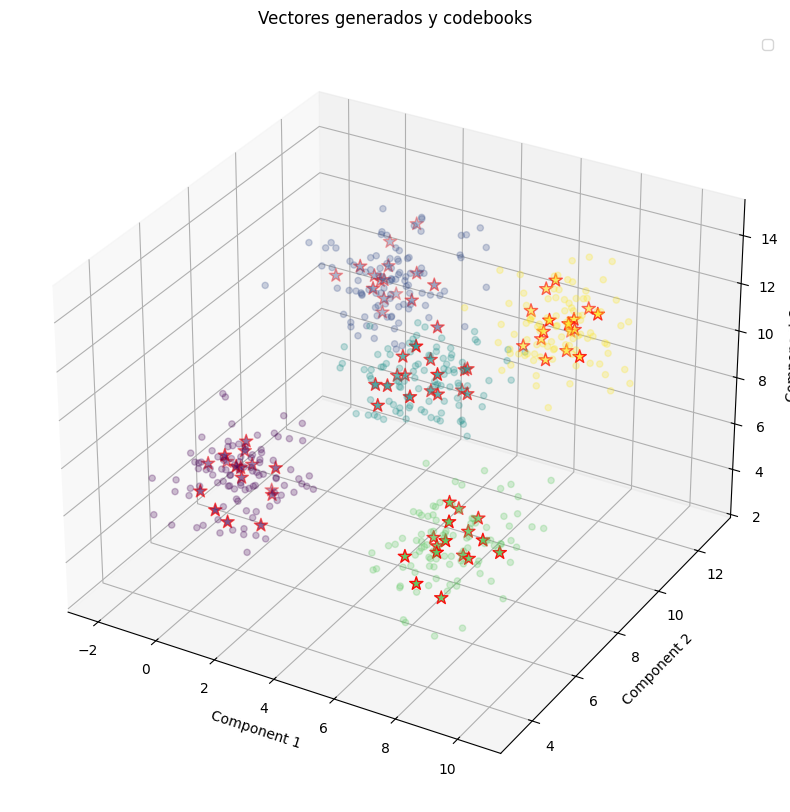

In [239]:
# Graficamos los puntos de cada codebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(train_vectors[:, 0], train_vectors[:, 1], train_vectors[:, 2], c=clusters, cmap='viridis', alpha=0.25)

ax.scatter(all_codes[:, 0], all_codes[:, 1], all_codes[:, 2], c=np.repeat(np.arange(k), M), cmap='viridis', marker='*', s=100, edgecolors='r')

ax.set_title("Vectores generados y codebooks")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()

plt.show()

In [240]:
# Clasificar los vectores de prueba

def classify_to_codebook(test_vectors, codebooks):
    """
    Clasify test vectors into their closest codebooks.
    
    :param test_vectors: Array of vectors to classify.
    :param codebooks: 3D array of shape (k, M, d) where k is the number of codebooks,
                      M is the number of centroids per codebook, and d is the dimensionality.
    :return: Array of the same length as test_vectors, indicating the index of the closest codebook.
    """
    closest_codebooks = []

    for vector in test_vectors:
        # Calculate the distance from the vector to all centroids in each codebook
        distances = []
        for codebook in codebooks:
            # Calculate the minimum distance from the vector to the centroids in the current codebook
            min_distance = np.min([np.linalg.norm(vector - centroid) for centroid in codebook])
            distances.append(min_distance)

        # Assign the vector to the codebook with the smallest distance
        closest_codebook = np.argmin(distances)
        closest_codebooks.append(closest_codebook)

    return np.array(closest_codebooks)

In [241]:
classes = classify_to_codebook(test_vectors, codebooks)
print(classes)

[4 0 1 2 2 4 0 0 2 3 1 3 2 0 1 1 4 4 2 2]


C:\Users\Willy\AppData\Local\Temp\ipykernel_20944\886414951.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


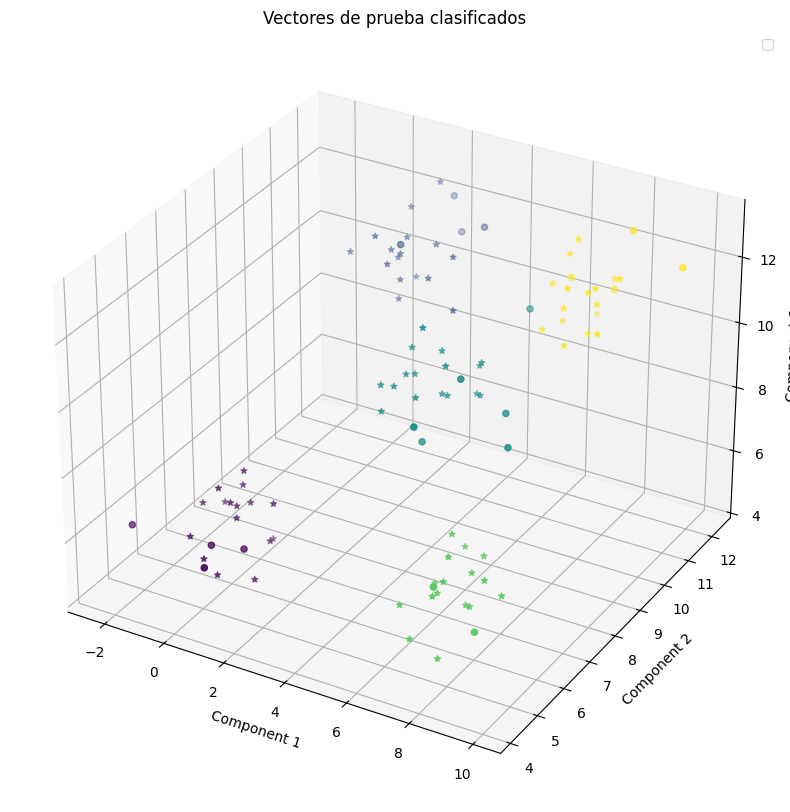

In [242]:
# Graficamos los puntos de cada codebook y los vectores clasificados
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(test_vectors[:, 0], test_vectors[:, 1], test_vectors[:, 2], c=classes, cmap='viridis')

ax.scatter(all_codes[:, 0], all_codes[:, 1], all_codes[:, 2], c=np.repeat(np.arange(k), M), cmap='viridis', marker='*')

ax.set_title("Vectores de prueba clasificados")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()

plt.show()